In [163]:
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download 'bhanupratapbiswas/twitter-stock-market-analysis-case-study'

mkdir: cannot create directory ‘/root/.kaggle’: File exists
twitter-stock-market-analysis-case-study.zip: Skipping, found more recently modified local copy (use --force to force download)


In [164]:
# from zipfile import ZipFile

# # specifying the name of the zip file
# file = "twitter-stock-market-analysis-case-study.zip"

# # open the zip file in read mode
# with ZipFile(file, 'r') as zipF:
#     # extract all files to another directory
#     zipF.extractall()

In [165]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, KFold, ShuffleSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [166]:
df = pd.read_csv("TWTR.csv")
# df = pd.read_csv("apple_share_price.csv")

Date: This is the date on which the stock market data was recorded. It's usually in the format of year-month-day (YYYY-MM-DD).

Open: This refers to the price of the stock at the beginning of the trading day. It's the first price at which the stock was traded when the market opened.

High: This represents the highest price at which the stock was traded during the trading day. It shows the peak value the stock reached during that specific day.

Low: This is the lowest price at which the stock was traded during the trading day. It indicates the lowest value the stock reached during that specific day.

Close: This is the price of the stock at the end of the trading day. It's the last price at which the stock was traded before the market closed.

Adj Close: The adjusted closing price reflects the stock's value after accounting for any corporate actions, such as dividends, stock splits, or bonus issues, that occurred during the trading day.

Volume: This is the total number of shares or contracts traded during a specific period of time (e.g., during the trading day). It gives an idea of the level of activity or interest in the stock.

In [167]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701670.0
1,2013-11-08,45.930000,46.939999,40.685001,41.650002,41.650002,27925307.0
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113941.0
3,2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316755.0
4,2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688325.0


In [168]:
# data frame shape
print(f"Shape of data: {df.shape}")

Shape of data: (2264, 7)


In [169]:
# each column data type
for col in df.columns:
    print(f"{col}: {df[col].dtype} \n")

Date: object 

Open: float64 

High: float64 

Low: float64 

Close: float64 

Adj Close: float64 

Volume: float64 



In [170]:
# looking for Na (null) values
for col in df.columns:
    print(f"Null Values for {col}:  {df[col].isna().sum()}")

Null Values for Date:  0
Null Values for Open:  5
Null Values for High:  5
Null Values for Low:  5
Null Values for Close:  5
Null Values for Adj Close:  5
Null Values for Volume:  5


In [171]:
# iterate every column with null values
for col in df.columns:
    print(df[df[col].isna()==True])

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []
            Date  Open  High  Low  Close  Adj Close  Volume
2259  2022-10-28   NaN   NaN  NaN    NaN        NaN     NaN
2260  2022-10-31   NaN   NaN  NaN    NaN        NaN     NaN
2261  2022-11-01   NaN   NaN  NaN    NaN        NaN     NaN
2262  2022-11-02   NaN   NaN  NaN    NaN        NaN     NaN
2263  2022-11-03   NaN   NaN  NaN    NaN        NaN     NaN
            Date  Open  High  Low  Close  Adj Close  Volume
2259  2022-10-28   NaN   NaN  NaN    NaN        NaN     NaN
2260  2022-10-31   NaN   NaN  NaN    NaN        NaN     NaN
2261  2022-11-01   NaN   NaN  NaN    NaN        NaN     NaN
2262  2022-11-02   NaN   NaN  NaN    NaN        NaN     NaN
2263  2022-11-03   NaN   NaN  NaN    NaN        NaN     NaN
            Date  Open  High  Low  Close  Adj Close  Volume
2259  2022-10-28   NaN   NaN  NaN    NaN        NaN     NaN
2260  2022-10-31   NaN   NaN  NaN    NaN        NaN     NaN
2261  2022-11-0

In [172]:
# drop rows with na values
df.dropna(inplace=True)

In [173]:
# validate if the na is removed
for col in df.columns:
    print(f"Null Values for {col}:  {df[col].isna().sum()}")

Null Values for Date:  0
Null Values for Open:  0
Null Values for High:  0
Null Values for Low:  0
Null Values for Close:  0
Null Values for Adj Close:  0
Null Values for Volume:  0


In [174]:
# check if theres a duplicate row
print(df[df.duplicated()])

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


In [175]:
#shows 5 first rows
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701670.0
1,2013-11-08,45.930000,46.939999,40.685001,41.650002,41.650002,27925307.0
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113941.0
3,2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316755.0
4,2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688325.0


In [176]:
#shows 5 last rows
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2254,2022-10-21,50.000000,50.750000,49.549999,49.889999,49.889999,51209029.0
2255,2022-10-24,50.709999,51.860001,50.520000,51.520000,51.520000,22987553.0
2256,2022-10-25,52.415001,53.180000,52.200001,52.779999,52.779999,35077848.0
2257,2022-10-26,52.950001,53.500000,52.770000,53.349998,53.349998,28064973.0
2258,2022-10-27,53.910000,54.000000,53.700001,53.700001,53.700001,136345128.0


# Feature Engineering

In [177]:
# add 'up' feature to indicate whether the stock raise or down (true or false)
df["Up"] = df["Open"] > df["Close"]

In [178]:
# shows the 'up' feature
print(df.head())

         Date       Open       High        Low      Close  Adj Close  \
0  2013-11-07  45.099998  50.090000  44.000000  44.900002  44.900002   
1  2013-11-08  45.930000  46.939999  40.685001  41.650002  41.650002   
2  2013-11-11  40.500000  43.000000  39.400002  42.900002  42.900002   
3  2013-11-12  43.660000  43.779999  41.830002  41.900002  41.900002   
4  2013-11-13  41.029999  42.869999  40.759998  42.599998  42.599998   

        Volume     Up  
0  117701670.0   True  
1   27925307.0   True  
2   16113941.0  False  
3    6316755.0   True  
4    8688325.0  False  


In [179]:
# define method for "percentage" new feature
def calc_per(df):
    return np.divide(df["Open"], df["Close"])

In [180]:
# implement the "percentage"
df["Percentage"] = df.apply(calc_per, axis="columns")

In [181]:
# shows the new features
print(df.head())

         Date       Open       High        Low      Close  Adj Close  \
0  2013-11-07  45.099998  50.090000  44.000000  44.900002  44.900002   
1  2013-11-08  45.930000  46.939999  40.685001  41.650002  41.650002   
2  2013-11-11  40.500000  43.000000  39.400002  42.900002  42.900002   
3  2013-11-12  43.660000  43.779999  41.830002  41.900002  41.900002   
4  2013-11-13  41.029999  42.869999  40.759998  42.599998  42.599998   

        Volume     Up  Percentage  
0  117701670.0   True    1.004454  
1   27925307.0   True    1.102761  
2   16113941.0  False    0.944056  
3    6316755.0   True    1.042005  
4    8688325.0  False    0.963146  


In [182]:
print(df.tail())

            Date       Open       High        Low      Close  Adj Close  \
2254  2022-10-21  50.000000  50.750000  49.549999  49.889999  49.889999   
2255  2022-10-24  50.709999  51.860001  50.520000  51.520000  51.520000   
2256  2022-10-25  52.415001  53.180000  52.200001  52.779999  52.779999   
2257  2022-10-26  52.950001  53.500000  52.770000  53.349998  53.349998   
2258  2022-10-27  53.910000  54.000000  53.700001  53.700001  53.700001   

           Volume     Up  Percentage  
2254   51209029.0   True    1.002205  
2255   22987553.0  False    0.984278  
2256   35077848.0  False    0.993085  
2257   28064973.0  False    0.992502  
2258  136345128.0   True    1.003911  


In [183]:
# convert date to string type with according format
df["Date"] = df["Date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

In [184]:
# shows that the date type has been changed
for col in df.columns:
    print(f"{col}: {df[col].dtype} \n")

Date: datetime64[ns] 

Open: float64 

High: float64 

Low: float64 

Close: float64 

Adj Close: float64 

Volume: float64 

Up: bool 

Percentage: float64 



In [185]:
# create new "year" feature
df["Year"] = df["Date"].apply(lambda x: x.year)

In [186]:
#shows the new features
print(df.head())

        Date       Open       High        Low      Close  Adj Close  \
0 2013-11-07  45.099998  50.090000  44.000000  44.900002  44.900002   
1 2013-11-08  45.930000  46.939999  40.685001  41.650002  41.650002   
2 2013-11-11  40.500000  43.000000  39.400002  42.900002  42.900002   
3 2013-11-12  43.660000  43.779999  41.830002  41.900002  41.900002   
4 2013-11-13  41.029999  42.869999  40.759998  42.599998  42.599998   

        Volume     Up  Percentage  Year  
0  117701670.0   True    1.004454  2013  
1   27925307.0   True    1.102761  2013  
2   16113941.0  False    0.944056  2013  
3    6316755.0   True    1.042005  2013  
4    8688325.0  False    0.963146  2013  


In [187]:
print(df.tail())

           Date       Open       High        Low      Close  Adj Close  \
2254 2022-10-21  50.000000  50.750000  49.549999  49.889999  49.889999   
2255 2022-10-24  50.709999  51.860001  50.520000  51.520000  51.520000   
2256 2022-10-25  52.415001  53.180000  52.200001  52.779999  52.779999   
2257 2022-10-26  52.950001  53.500000  52.770000  53.349998  53.349998   
2258 2022-10-27  53.910000  54.000000  53.700001  53.700001  53.700001   

           Volume     Up  Percentage  Year  
2254   51209029.0   True    1.002205  2022  
2255   22987553.0  False    0.984278  2022  
2256   35077848.0  False    0.993085  2022  
2257   28064973.0  False    0.992502  2022  
2258  136345128.0   True    1.003911  2022  


In [188]:
# grouping by year
df_by_year = df.groupby("Year")

In [189]:
# search standard deviation and volumes mean annually
volumes = df_by_year["Volume"].mean()
sd = df_by_year["Volume"].std()

Text(0.5, 1.0, 'Mean Number of Shares Traded per Day by Year')

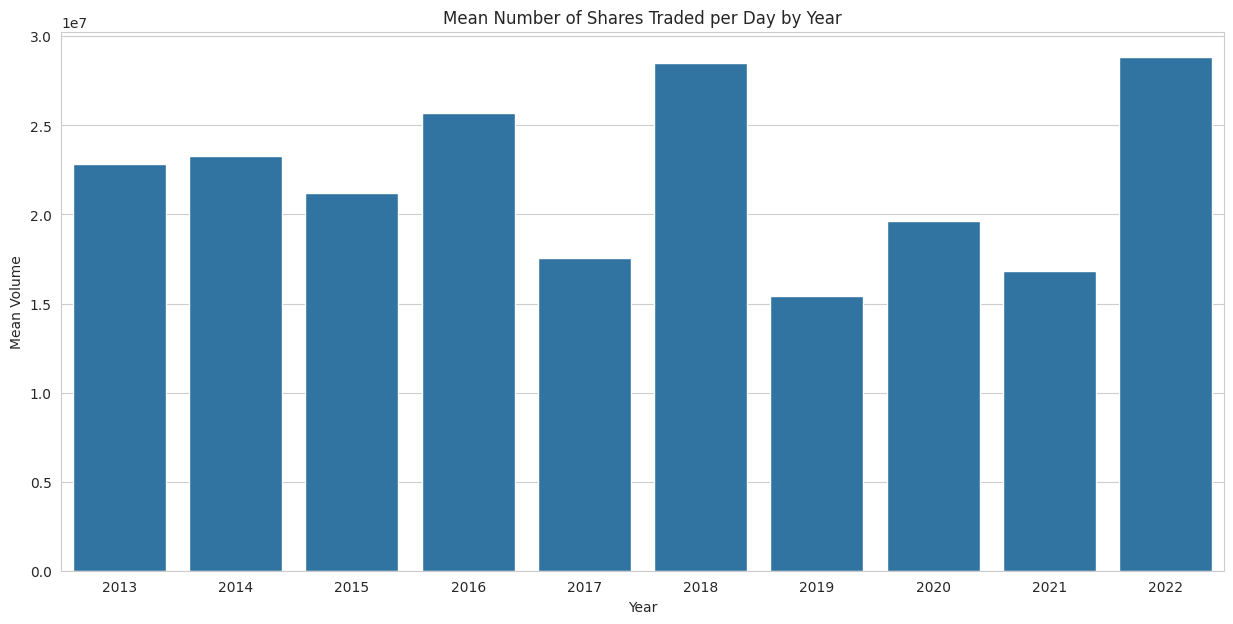

In [190]:
# shows volume mean
plt.figure(figsize=(15,7))
sns.barplot(x=volumes.index, y=volumes.values)
sns.set_style("darkgrid")
plt.xlabel("Year")
plt.ylabel("Mean Volume")
plt.title("Mean Number of Shares Traded per Day by Year")

Text(0.5, 1.0, 'Standard Deviation of Shares Traded per Day by Year')

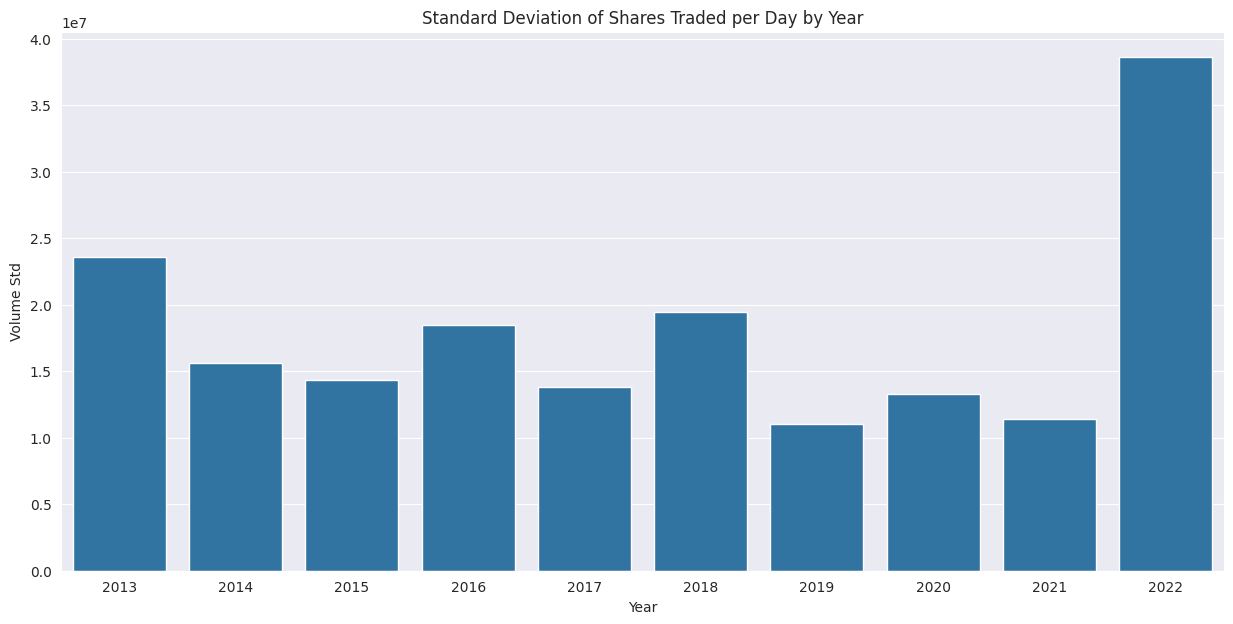

In [191]:
# shows standard deviation
plt.figure(figsize=(15,7))
sns.barplot(x=sd.index, y=sd.values)
sns.set_style("darkgrid")
plt.xlabel("Year")
plt.ylabel("Volume Std")
plt.title("Standard Deviation of Shares Traded per Day by Year")

In [192]:
# create dictionary for the groups to be used in the subplots
group_dict = dict(list(df_by_year["Volume"]))
dates = []
for i in range(10):
    date = datetime(2013+i, 1, 1)

    # add the dates 2013-2022 into the dates array to be used as titles
    dates.append(date.year)

print(dates)

[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


In [193]:
# shows currently created dict of years
print(group_dict.keys())

dict_keys([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])


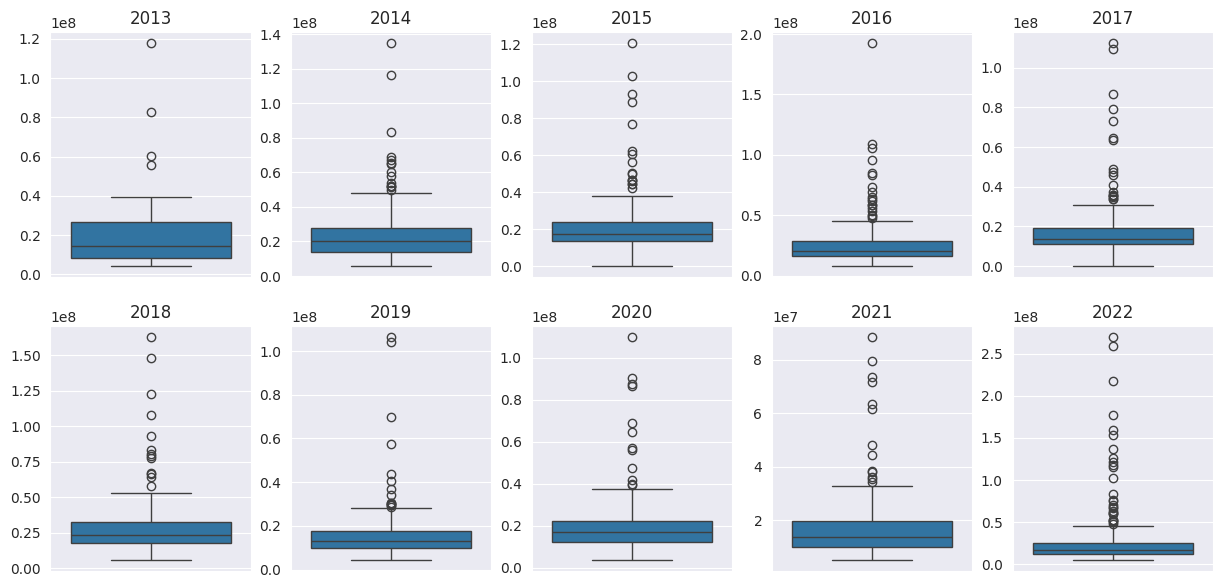

In [194]:
# boxplot of the distributions by year
fig, axes = plt.subplots(2, 5, sharex=True, figsize=(15,7))
count = 0
for ax in axes:
    for year, axe in zip(dates[count:], ax):
        dt = group_dict[year]
        count+=1
        sns.boxplot(np.array(dt), ax=axe)
        axe.set_title(year)

Year 2013: Removed 34 outliers
Year 2014: Removed 224 outliers
Year 2015: Removed 229 outliers
Year 2016: Removed 223 outliers
Year 2017: Removed 225 outliers
Year 2018: Removed 231 outliers
Year 2019: Removed 217 outliers
Year 2020: Removed 213 outliers
Year 2021: Removed 228 outliers
Year 2022: Removed 189 outliers


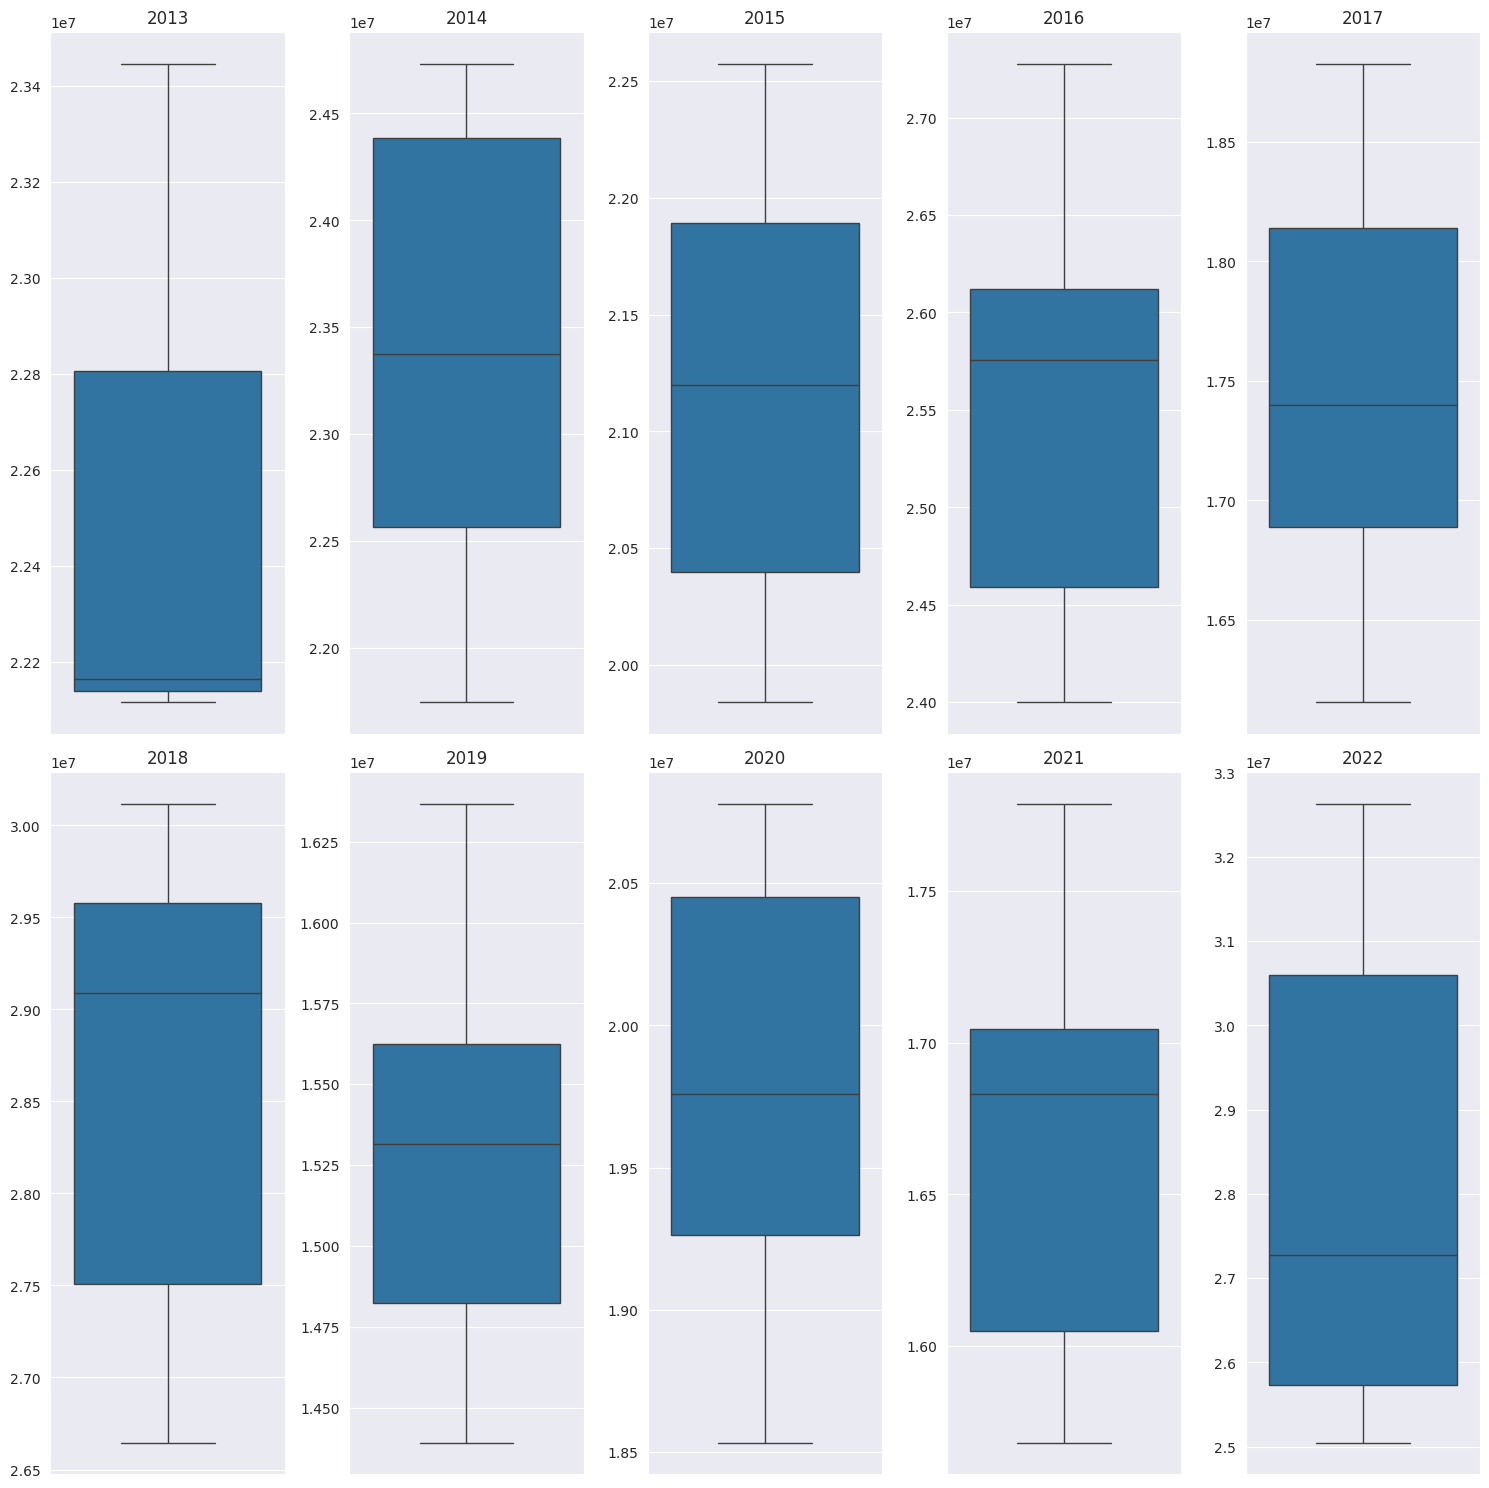

In [195]:
# Function to remove outliers based on z-score
def remove_outliers_zscore(data, threshold=0.1):
    z_scores = np.abs((data - np.mean(data)) / np.std(data))
    return data[z_scores <= threshold]

# boxplot of the distributions by year after removing outliers using z-score
fig, axes = plt.subplots(2, 5, sharex=True, figsize=(15, 15))
count = 0
for ax_row in axes:
    for year, ax in zip(dates[count:], ax_row):
        dt = group_dict[year]
        dt_no_outliers = remove_outliers_zscore(np.array(dt))
        sns.boxplot(dt_no_outliers, ax=ax)
        ax.set_title(year)
        # Calculate and print the number of outliers removed
        num_outliers_removed = len(dt) - len(dt_no_outliers)
        print(f"Year {year}: Removed {num_outliers_removed} outliers")
    count += len(ax_row)  # Increment count by the number of columns

plt.tight_layout()
plt.show()


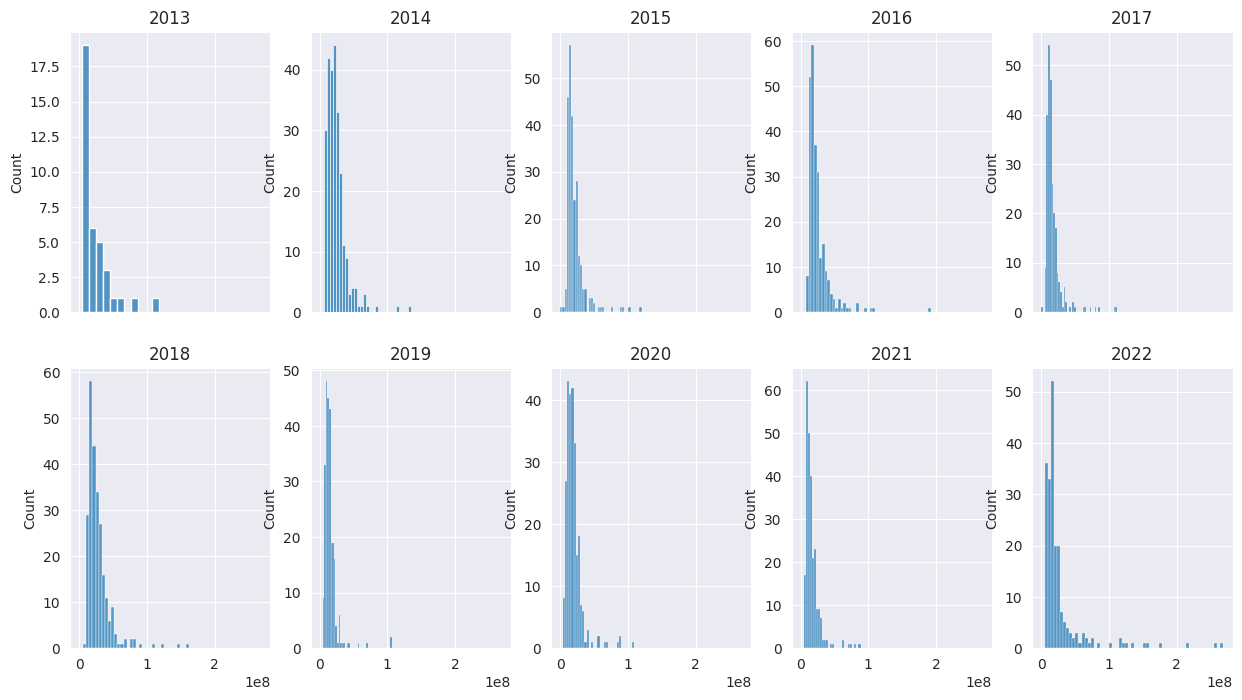

In [196]:
# histogram of the distributions by year
fig, axes = plt.subplots(2, 5, sharex=True, figsize=(15,8))
count = 0
for ax in axes:
    for year, axe in zip(dates[count:], ax):
        dt_no_outliers = group_dict[year]
        count+=1
        sns.histplot(np.array(dt_no_outliers), ax=axe)
        axe.set_title(year)

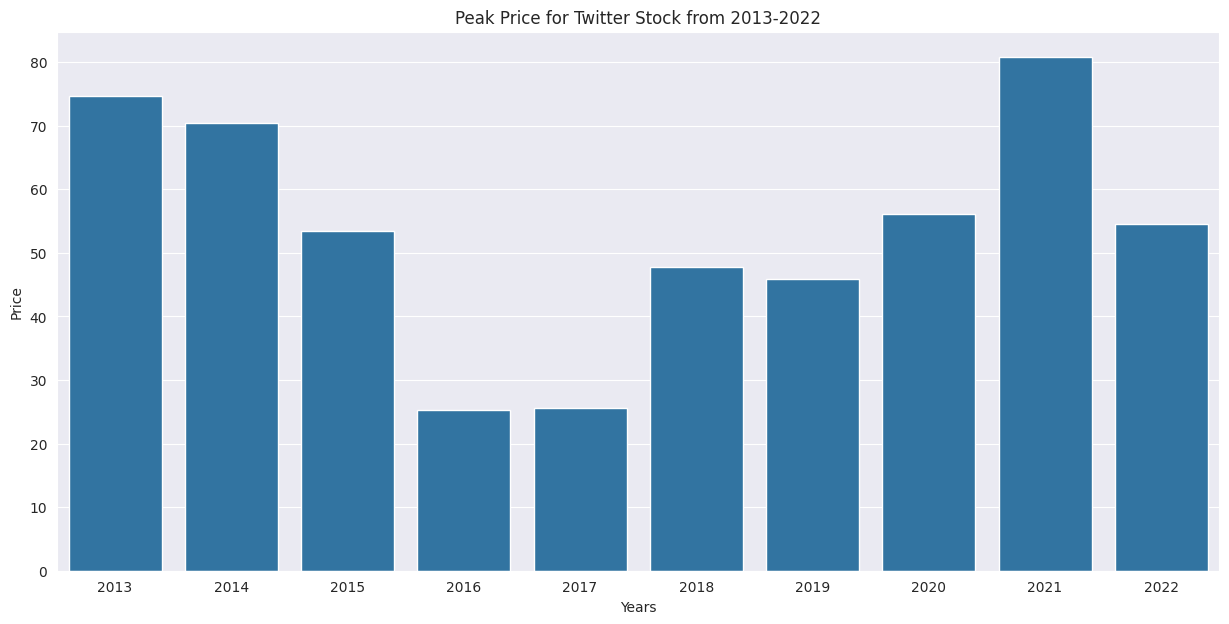

In [197]:
# shows peak value for each year
peaks = df_by_year["High"].max()
plt.figure(figsize=(15,7))
sns.barplot(x=peaks.index, y=peaks.values)
plt.xlabel("Years")
plt.ylabel("Price")
plt.title("Peak Price for Twitter Stock from 2013-2022")
sns.set_style("whitegrid")

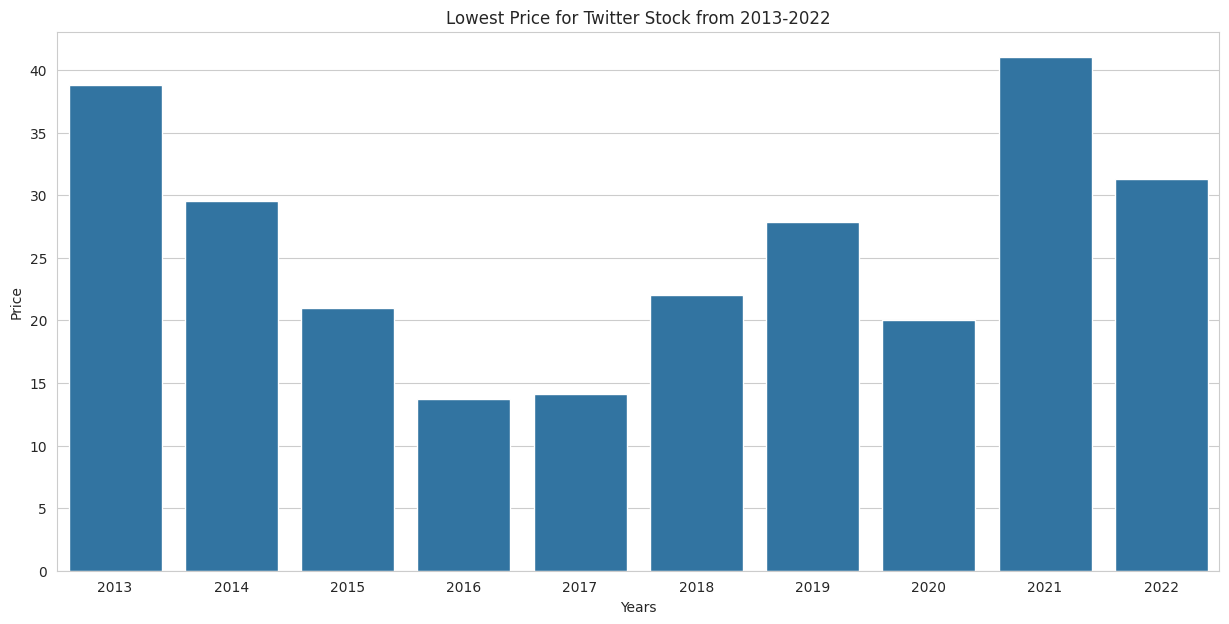

In [198]:
# shows lowest value in each year
valleys = df_by_year["Low"].min()
plt.figure(figsize=(15,7))
sns.barplot(x=valleys.index, y=valleys.values)
plt.xlabel("Years")
plt.ylabel("Price")
plt.title("Lowest Price for Twitter Stock from 2013-2022")
sns.set_style("whitegrid")

In [199]:
# shows the data again to be spiltted
print(df.head())

        Date       Open       High        Low      Close  Adj Close  \
0 2013-11-07  45.099998  50.090000  44.000000  44.900002  44.900002   
1 2013-11-08  45.930000  46.939999  40.685001  41.650002  41.650002   
2 2013-11-11  40.500000  43.000000  39.400002  42.900002  42.900002   
3 2013-11-12  43.660000  43.779999  41.830002  41.900002  41.900002   
4 2013-11-13  41.029999  42.869999  40.759998  42.599998  42.599998   

        Volume     Up  Percentage  Year  
0  117701670.0   True    1.004454  2013  
1   27925307.0   True    1.102761  2013  
2   16113941.0  False    0.944056  2013  
3    6316755.0   True    1.042005  2013  
4    8688325.0  False    0.963146  2013  


In [200]:
df["Up"] = df["Up"].apply(lambda x: 1 if x==True else 0)

In [201]:
# shows the data again to be spiltted
print(df.head())

        Date       Open       High        Low      Close  Adj Close  \
0 2013-11-07  45.099998  50.090000  44.000000  44.900002  44.900002   
1 2013-11-08  45.930000  46.939999  40.685001  41.650002  41.650002   
2 2013-11-11  40.500000  43.000000  39.400002  42.900002  42.900002   
3 2013-11-12  43.660000  43.779999  41.830002  41.900002  41.900002   
4 2013-11-13  41.029999  42.869999  40.759998  42.599998  42.599998   

        Volume  Up  Percentage  Year  
0  117701670.0   1    1.004454  2013  
1   27925307.0   1    1.102761  2013  
2   16113941.0   0    0.944056  2013  
3    6316755.0   1    1.042005  2013  
4    8688325.0   0    0.963146  2013  


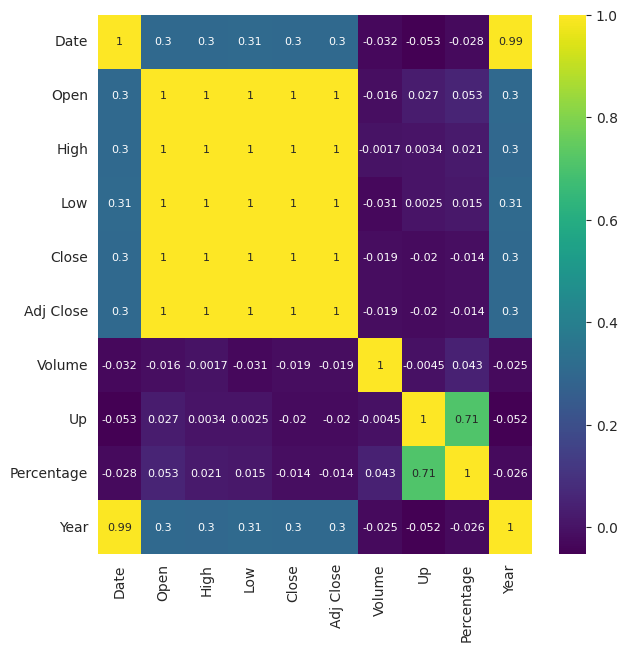

In [202]:
plt.figure(figsize=(7,7))
cor1 = df.corr()
sns.heatmap(cor1, annot=True, cmap="viridis",annot_kws={"size":8})
plt.show()

In [203]:
# we will predict closing price
y = np.array(df["Close"])
X = np.array(df.drop(["Date", "Close", "Adj Close"], axis="columns"))

In [204]:
# split dataset into 30-70 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [205]:
# shows splitted data shape
print(f"X_train Shape: {X_train.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_test Shape: {X_test.shape}")

X_train Shape: (1581, 7)
y_train Shape: (1581,)
X_test Shape: (678, 7)
y_test Shape: (678, 7)


In [206]:
# feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [207]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression, BayesianRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# define models and their names
models = [
    Ridge(),
    LinearRegression(),
    Lasso(alpha=0.05),
    make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    BayesianRidge()
]

model_names = [
    'Ridge',
    'Linear Regression',
    'Lasso',
    'Polynomial Regression',
    'Bayesian Regression'
]

In [208]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def perform_simple_regression(X_train_scaled, X_test_scaled, y_train, y_test, models, model_names):
    results = {}

    for model, model_name in zip(models, model_names):
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results[model_name] = {
            f"{model_name}_rmse": rmse,
            f"{model_name}_mse": mse,
            f"{model_name}_mae": mae,
            f"{model_name}_r2": r2
        }

    return results

results_simple = perform_simple_regression(X_train_scaled, X_test_scaled, y_train, y_test, models=models, model_names=model_names)


In [209]:
# print the results
for model_name, metrics in results_simple.items():
    print(f"\nMetrics for {model_name}:")
    for metric_name, value in metrics.items():
        print(f"simple_{metric_name}: {value}")


Metrics for Ridge:
simple_Ridge_rmse: 0.27853639833258814
simple_Ridge_mse: 0.07758252519609021
simple_Ridge_mae: 0.19382080866798396
simple_Ridge_r2: 0.9996114000965131

Metrics for Linear Regression:
simple_Linear Regression_rmse: 0.27861495817122844
simple_Linear Regression_mse: 0.07762629491675538
simple_Linear Regression_mae: 0.19440519597371608
simple_Linear Regression_r2: 0.9996111808601684

Metrics for Lasso:
simple_Lasso_rmse: 0.301967620679768
simple_Lasso_mse: 0.09118444393900024
simple_Lasso_mae: 0.19533699793821724
simple_Lasso_r2: 0.9995432700079735

Metrics for Polynomial Regression:
simple_Polynomial Regression_rmse: 0.024426947093200754
simple_Polynomial Regression_mse: 0.0005966757442940288
simple_Polynomial Regression_mae: 0.0047816800793449845
simple_Polynomial Regression_r2: 0.9999970113355288

Metrics for Bayesian Regression:
simple_Bayesian Regression_rmse: 0.27860975692948614
simple_Bayesian Regression_mse: 0.07762339665630735
simple_Bayesian Regression_mae: 0.

In [210]:
def perform_kfold_regression(X, y, models, model_names, n_splits=10, scoring='neg_mean_squared_error', random_state=None):
    results_kfold = {}

    for model, model_name in zip(models, model_names):
        # KFold cross-validation
        kfold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
        kfold_scores = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
        kfold_rmse_scores = np.sqrt(-kfold_scores)

        # Calculate positive MSE, MAE, and R2 for comparison
        kfold_mse_scores = -kfold_scores
        kfold_mae_scores = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
        kfold_r2_scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')

        results_kfold[model_name] = {
            f"{model_name}_rmse": kfold_rmse_scores.mean(),
            f"{model_name}_mse": kfold_mse_scores.mean(),
            f"{model_name}_mae": -kfold_mae_scores.mean(),  # Convert back to positive MAE
            f"{model_name}_r2": kfold_r2_scores.mean()
        }

    return results_kfold

results_kfold = perform_kfold_regression(X_train_scaled, y_train, models=models, model_names=model_names)


In [211]:
# print the results
for model_name, metrics in results_kfold.items():
    print(f"\nMetrics for {model_name}:")
    for metric_name, value in metrics.items():
        print(f"kfold_{metric_name}: {value}")


Metrics for Ridge:
kfold_Ridge_rmse: 0.2922181976156832
kfold_Ridge_mse: 0.08641150869171757
kfold_Ridge_mae: 0.19424218315406688
kfold_Ridge_r2: 0.9995594368897665

Metrics for Linear Regression:
kfold_Linear Regression_rmse: 0.29235652906315723
kfold_Linear Regression_mse: 0.08703868724323749
kfold_Linear Regression_mae: 0.19461917220072739
kfold_Linear Regression_r2: 0.9995597974299768

Metrics for Lasso:
kfold_Lasso_rmse: 0.31317938598639256
kfold_Lasso_mse: 0.0996395382475369
kfold_Lasso_mae: 0.19507408583383398
kfold_Lasso_r2: 0.9994861469675991

Metrics for Polynomial Regression:
kfold_Polynomial Regression_rmse: 0.012144273481013055
kfold_Polynomial Regression_mse: 0.00022519983903138222
kfold_Polynomial Regression_mae: 0.004567437180143361
kfold_Polynomial Regression_r2: 0.9999979425219744

Metrics for Bayesian Regression:
kfold_Bayesian Regression_rmse: 0.2933864860715094
kfold_Bayesian Regression_mse: 0.08703343465948858
kfold_Bayesian Regression_mae: 0.19460909260617693
kf

In [212]:
# shows models to be used in ensemble
model_tuples = [(model_names[i], models[i]) for i in range(len(models))]
print(model_tuples)

[('Ridge', Ridge()), ('Linear Regression', LinearRegression()), ('Lasso', Lasso(alpha=0.05)), ('Polynomial Regression', Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])), ('Bayesian Regression', BayesianRidge())]


In [213]:
from sklearn.ensemble import BaggingRegressor

# Assuming X_train_scaled and y_train are already scaled

# Create base regressor model
base_regressor = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Create BaggingRegressor ensemble model with scaled features
bagging_model = BaggingRegressor(base_estimator=base_regressor, n_estimators=5, random_state=0)

# KFold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=0)
kfold_scores = cross_val_score(bagging_model, X_train_scaled, y_train, cv=kfold, scoring='neg_mean_squared_error')
kfold_rmse_scores = np.sqrt(-kfold_scores)

# Calculate positive MSE, MAE, and R2 for comparison
kfold_mse_scores = -kfold_scores
kfold_mae_scores = cross_val_score(bagging_model, X_train_scaled, y_train, cv=kfold, scoring='neg_mean_absolute_error')
kfold_r2_scores = cross_val_score(bagging_model, X_train_scaled, y_train, cv=kfold, scoring='r2')

bagging_mae = -kfold_mae_scores.mean()
bagging_rmse = kfold_rmse_scores.mean()
bagging_mse = kfold_mse_scores.mean()
bagging_r2 = kfold_r2_scores.mean()

print("Bagging Regressor:")
print(f"KFold R2 Scores: {kfold_r2_scores}")
print(f"KFold MAE Mean: {bagging_mae}")
print(f"KFold RMSE Mean: {bagging_rmse}")
print(f"KFold MSE Mean: {bagging_mse}")
print(f"KFold R2 Mean: {bagging_r2}")


Bagging Regressor:
KFold R2 Scores: [0.9999995  0.99999942 0.9999996  0.99999937 0.99999942 0.99999932
 0.99999983 0.9999998  0.99999948 0.99999868]
KFold MAE Mean: 0.0046163439295641975
KFold RMSE Mean: 0.010137365943451552
KFold MSE Mean: 0.00011064538716043099
KFold R2 Mean: 0.9999994405835751


In [214]:
from prettytable import PrettyTable

# Assuming 'results' is a dictionary containing metrics for different models
# and 'bagging_rmse', 'bagging_mse', 'bagging_r2' are metrics for the ensemble

# Create a PrettyTable instance
table = PrettyTable(['Model', 'KFold MAE Mean', 'KFold RMSE Mean', 'KFold MSE Mean', 'KFold R2 Mean'])
simpleTable = PrettyTable(['Model', 'KFold MAE Mean', 'KFold RMSE Mean', 'KFold MSE Mean', 'KFold R2 Mean'])

for model_name, metrics in results_simple.items():
    row_data = [
        model_name,
        metrics[f"{model_name}_mae"],
        metrics[f"{model_name}_rmse"],
        metrics[f"{model_name}_mse"],
        metrics[f"{model_name}_r2"]
    ]
    simpleTable.add_row(row_data)

# Iterate through the results and add rows to the table
for model_name, metrics in results_kfold.items():
    row_data = [
        model_name,
        metrics[f"{model_name}_mae"],
        metrics[f"{model_name}_rmse"],
        metrics[f"{model_name}_mse"],
        metrics[f"{model_name}_r2"]
    ]
    table.add_row(row_data)

ensemble_row_data = [
    'Ensemble Learning (Bagging)',
    bagging_mae,
    bagging_rmse,
    bagging_mse,
    bagging_r2
]
table.add_row(ensemble_row_data)

# Print the table
print(f"Non K-Fold")
print(simpleTable)
print(f"Using K-Fold")
print(table)


Non K-Fold
+-----------------------+-----------------------+----------------------+-----------------------+--------------------+
|         Model         |     KFold MAE Mean    |   KFold RMSE Mean    |     KFold MSE Mean    |   KFold R2 Mean    |
+-----------------------+-----------------------+----------------------+-----------------------+--------------------+
|         Ridge         |  0.19382080866798396  | 0.27853639833258814  |  0.07758252519609021  | 0.9996114000965131 |
|   Linear Regression   |  0.19440519597371608  | 0.27861495817122844  |  0.07762629491675538  | 0.9996111808601684 |
|         Lasso         |  0.19533699793821724  |  0.301967620679768   |  0.09118444393900024  | 0.9995432700079735 |
| Polynomial Regression | 0.0047816800793449845 | 0.024426947093200754 | 0.0005966757442940288 | 0.9999970113355288 |
|  Bayesian Regression  |  0.19438618799063892  | 0.27860975692948614  |  0.07762339665630735  | 0.9996111953771454 |
+-----------------------+--------------------